In [66]:
from sys import flags

import pandas as pd
import matplotlib.pyplot as plt

# Dataset Overview

In [67]:
df_titles= pd.read_csv('netflix_titles.csv')
df_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [68]:
df_titles.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [69]:
df_titles.shape

(8807, 12)

# Identifying missing data

In [70]:
df_titles.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [71]:
# % of rows missing in each column
for column in df_titles.columns:
    percentage = df_titles[column].isnull().mean() * 100
    print(f"{column}: {percentage:.2f}% missing")

show_id: 0.00% missing
type: 0.00% missing
title: 0.00% missing
director: 29.91% missing
cast: 9.37% missing
country: 9.44% missing
date_added: 0.11% missing
release_year: 0.00% missing
rating: 0.05% missing
duration: 0.03% missing
listed_in: 0.00% missing
description: 0.00% missing


# Dealing with missing data

In [72]:
df_titles.drop('director',axis=1)

no_director_indices = df_titles[df_titles['director'].isnull()].index

df_titles.drop(no_director_indices, axis=0,inplace=True)


In [73]:

# Replace it by the mean, median (numeric data) or mode (categorical data)
df_titles[df_titles['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [74]:
mode = ''.join(df_titles['rating'].mode())
df_titles['rating']=df_titles['rating'].fillna(mode)


In [75]:
df_titles.loc[5541]

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                     74 min
duration                                                      NaN
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object

In [76]:
# Replace it by an arbitrary number with .fillna()
df_titles['duration']=df_titles['duration'].fillna('0')

# Identifying Outliers

In [77]:
df_movie['duration'].str.extract(r'(\d+)', expand=True).loc[5541]

0    0
Name: 5541, dtype: object

In [78]:
df_movie['rating'].value_counts()

rating
TV-MA       1994
TV-14       1393
R            794
TV-PG        517
PG-13        489
PG           286
TV-Y7        123
TV-G         114
TV-Y         105
NR            75
G             41
TV-Y7-FV       4
UR             3
NC-17          2
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [79]:
df_movie['duration'].str.split(n=0,expand=True)[0].astype(int)

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: 0, Length: 5943, dtype: int64

In [80]:
# selecting only movies
df_movie = df_titles[df_titles['type']=='Movie']

In [81]:
# Split Strings by Characters with the str.split Method
df_movie = df_movie.assign(minute = df_movie['duration'].str.split(expand=True)[0].astype(int))

In [83]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


## Using histograms to identify outliers within numeric data

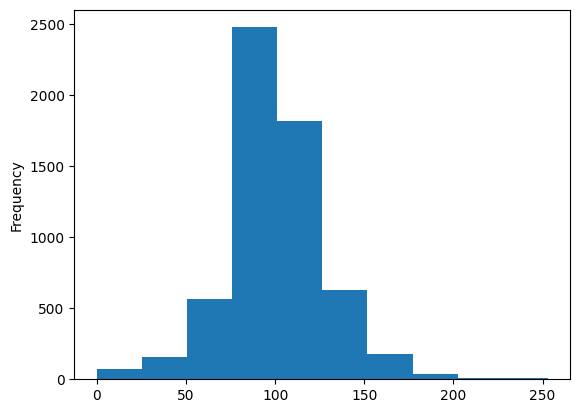

In [84]:
ax = df_movie['minute'].plot(kind='hist',bins=10)

In [85]:
# get bar ranges with value_counts method and numbers of bins
df_movie['minute'].value_counts(bins=10).sort_index()

(-0.254, 25.3]      72
(25.3, 50.6]       157
(50.6, 75.9]       567
(75.9, 101.2]     2475
(101.2, 126.5]    1813
(126.5, 151.8]     631
(151.8, 177.1]     178
(177.1, 202.4]      34
(202.4, 227.7]      10
(227.7, 253.0]       6
Name: count, dtype: int64

In [87]:
# Dealing with outliers
df_movie[(df_movie['minute'] < 64.8) | (df_movie['minute']>157.5)].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,61
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13


## Using boxplot to identify outliers within numeric data

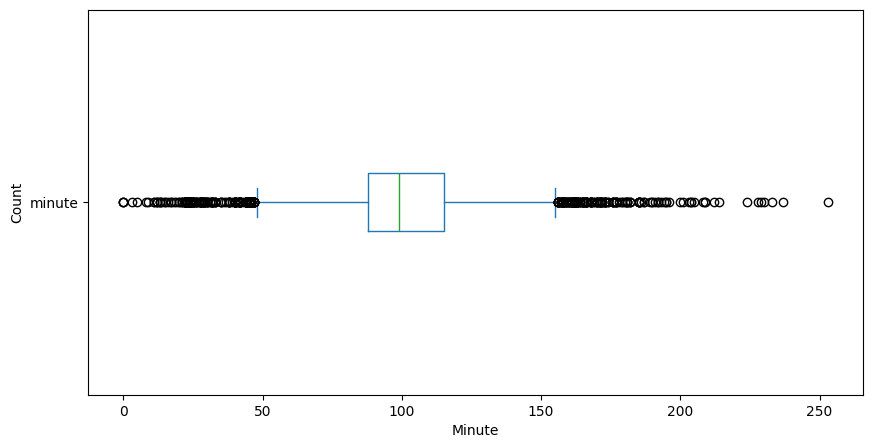

In [91]:
# make a boxplot
df_movie['minute'].plot(kind='box', vert=False,figsize=(10,5))
plt.xlabel('Minute')
plt.ylabel('Count')

plt.show()

In [92]:
# overview descriptive statitics
# IQR = Q3-Q1
min_boxplot = 87 - 1.5*(114 - 87) # Q1 - 1.5*IQR
max_boxplot = 114 + 1.5*(114 - 87) # Q3 + 1.5*IQR

print(df_movie['minute'].describe())
print(min_boxplot)
print(max_boxplot)

count    5943.000000
mean      100.533064
std        27.399894
min         0.000000
25%        88.000000
50%        99.000000
75%       115.000000
max       253.000000
Name: minute, dtype: float64
46.5
154.5


In [93]:
# Dealing with Outliers
df_movie[(df_movie['minute']<46.5) | (df_movie['minute']>154.5)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,191
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,171
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",157


## Using bars to identify outliers within categorical data

<Axes: xlabel='rating'>

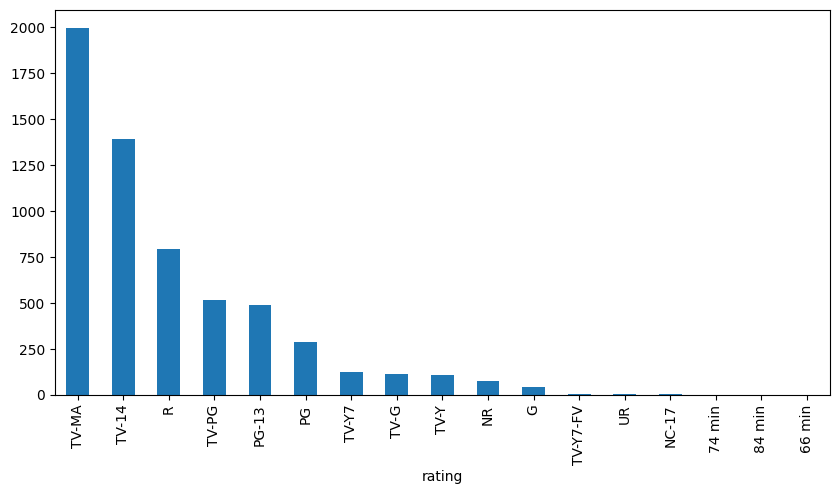

In [94]:
df_movie['rating'].value_counts().plot(kind='bar', figsize=(10,5))

# Text Normalization

## Dealing with inconsistent capitalization : lower(), upper() , title()

In [99]:
df_movie['title']= df_movie['title'].str.title()

## Remove blank spaces with strip(), Istrip(), rstrip()

In [100]:

# how the strip method workds
movie_title = " Titanic    "

# trim leading space with lstrip()
print(movie_title.lstrip())
# trim trailing space with rstrip()
print(movie_title.rstrip())
# trim leading and trailing space with strip()
print(movie_title.strip())

Titanic    
 Titanic
Titanic


In [101]:
# get rid of leading and trailing white spaces with the apply method
df_movie['title'].apply(lambda x:x.strip())

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 5943, dtype: object

## Replace strings with replace() or sub()

In [107]:
# remove punctuation signs with the str.replace() method and regex
# df_movie['title'].str.replace('[^\w\s]', '', regex=True)


# remove punctuation signs with the replace() method and regex
# df_movie['title'].replace('[^\w\s]', '', regex=True)

# difference between str.replace() and replace()
# str.replace(): perform string or regex substitution on string data.
# replace():  can replace any type of data

# df_movie['title'].replace(1, 2, regex=True)
# df_movie['title'].str.replace(1, 2, regex=True)

# remove punctuation signs with the re.sub() function via teh apply method
import re
df_movie['title'].apply(lambda x:re.sub('[^\w\s]','',x))

<>:17: SyntaxWarning: invalid escape sequence '\w'
<>:17: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_4180\2406192494.py:17: SyntaxWarning: invalid escape sequence '\w'
  df_movie['title'].apply(lambda x:re.sub('[^\w\s]','',x))


0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 5943, dtype: object